# UTS Penambangan Data 

**Metode Naive Bayes Classifier**

**Metode Pohon Keputusan Desision Tree**

**Pengertian  Desision Tree**

Decision Tree adalah sebuah cara/pemikiran/pembuatan keputusan yang berbentuk sekumpulan simpul seperti pohon yang dapat memberikan suatu jawaban dari beberapa pilihan Tindakan. Biasanya decision tree dimulai dari satu node atau satu simpul. Kemudian node tersebut bercabang untuk memberikan pilihan-pilihan Tindakan yang lain. Selanjutnya node tersebut akan memiliki cabang-cabang baru. Dalam pembuatan node atau cabang baru akan terus di ulang sampai kriteria berhenti dipenuhi. Decision tree biasanya dapat memperoses dataset yang berisi atribut nominal atau numerik. Label attribute harus berbentuk nominal untuk proses klasifikasi dan berbentuk numerik untuk regresi.

**Langkah Metode Naive Bayes**


1. Menghitung jumlah kelas/label
2. Menghitung jumlah kasus perkelas
3. Mengalikan semua hasil variable kelas
4. Membandingkan hasil perkelas





In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn import tree
import seaborn as sns
%matplotlib inline

In [2]:
import warnings

warnings.filterwarnings('ignore')

In [3]:
dataset_url="https://raw.githubusercontent.com/Theresia028/datamining/gh-pages/dataR2.csv"
df = pd.read_csv(dataset_url, index_col=0)

In [4]:
df.head()

,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,,,,,,,,,
48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 116 entries, 48 to 86
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   BMI             116 non-null    float64
 1   Glucose         116 non-null    int64  
 2   Insulin         116 non-null    float64
 3   HOMA            116 non-null    float64
 4   Leptin          116 non-null    float64
 5   Adiponectin     116 non-null    float64
 6   Resistin        116 non-null    float64
 7   MCP.1           116 non-null    float64
 8   Classification  116 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 9.1 KB


In [6]:
col_names = ['BMI', 'Glucose', 'Insulin', 'HOMA', 'Leptin', 'Adiponectin', 'Resistin', 'MCP.1', 'Classification']


for col in col_names:
    
    print(df[col].value_counts())   

21.367521    2
32.461911    2
27.688778    2
31.975015    2
31.250000    2
            ..
29.606767    1
34.422174    1
35.855815    1
36.790166    1
27.180000    1
Name: BMI, Length: 110, dtype: int64
92     9
90     6
87     4
77     4
103    4
97     4
83     4
82     4
101    4
86     4
85     4
93     3
102    3
89     3
98     3
84     3
95     3
100    3
88     3
94     3
105    2
99     2
112    2
134    2
131    2
70     2
78     2
106    2
196    1
119    1
152    1
108    1
104    1
91     1
118    1
128    1
139    1
199    1
76     1
60     1
75     1
201    1
114    1
116    1
80     1
79     1
74     1
110    1
96     1
138    1
Name: Glucose, dtype: int64
18.077    2
3.226     2
4.530     2
2.707     1
4.172     1
         ..
5.646     1
4.181     1
5.819     1
3.855     1
19.910    1
Name: Insulin, Length: 113, dtype: int64
0.467409    1
1.144780    1
3.071407    1
1.008511    1
2.871792    1
           ..
0.732193    1
5.091856    1
1.840410    1
2.534932    1
6.77736

In [8]:
df['Classification'].value_counts()

2    64
1    52
Name: Classification, dtype: int64

In [9]:
# melakukan cek apabila terdapat missing values pada variabel

df.isnull().sum()

BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [10]:
#mendeklarasikan fitur vector dan target variabel

X = df.drop(['Classification'], axis=1)
y = df['Classification']

In [11]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [16]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((77, 8), (39, 8))

In [17]:
# melakukan cek tipe data pada X_train

X_train.dtypes

BMI            float64
Glucose          int64
Insulin        float64
HOMA           float64
Leptin         float64
Adiponectin    float64
Resistin       float64
MCP.1          float64
dtype: object

In [18]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [19]:
# instantiate the DecisionTreeClassifier model with criterion gini index

clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)


# fit the model
clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [20]:
DecisionTreeClassifier(max_depth=3, random_state=0)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [22]:
y = df["Classification"]
X = df.drop(columns=["Classification"])
clf = tree.DecisionTreeClassifier(criterion="gini")
clf = clf.fit(X, y)

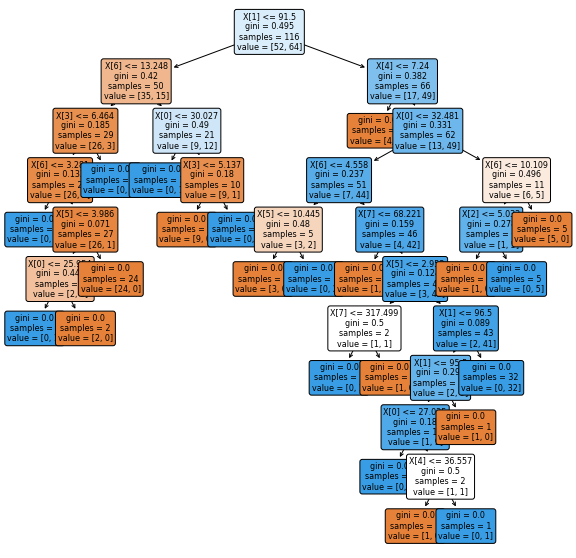

In [23]:
#plt the figure, setting a black background
plt.figure(figsize=(10,10))
#create the tree plot
a = tree.plot_tree(clf,
                   rounded = True,
                   filled = True,
                   fontsize=8)
#show the plot
plt.show()